<a href="https://colab.research.google.com/github/DakshDudeja/Code-C-/blob/main/AlertTired(Latest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import layers
from keras import models

In [ ]:
import sys, os
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/My Drive/Driver_Data/output/train"
validation_dir="/content/drive/My Drive/Driver_Data/output/val"
test_dir="/content/drive/My Drive/Driver_Data/output/test"
train_alert_dir="/content/drive/My Drive/Driver_Data/output/train/alert"
train_tired_dir="/content/drive/My Drive/Driver_Data/output/train/tired"
train_nv_dir="/content/drive/My Drive/Driver_Data/output/train/nv"
validation_alert_dir="/content/drive/My Drive/Driver_Data/output/val/alert"
validation_tired_dir="/content/drive/My Drive/Driver_Data/output/val/tired"
validation_nv_dir="/content/drive/My Drive/Driver_Data/output/val/nv"
test_alert_dir="/content/drive/My Drive/Driver_Data/output/test/alert"
test_tired_dir="/content/drive/My Drive/Driver_Data/output/test/tired"
test_nv_dir="/content/drive/My Drive/Driver_Data/output/test/nv"

In [ ]:
print('Total training alert images:', len(os.listdir(train_alert_dir)))
print('Total training tired images:', len(os.listdir(train_tired_dir)))
print('Total training non-vigilant images:', len(os.listdir(train_nv_dir)))

Total training alert images: 1001
Total training tired images: 1148
Total training non-vigilant images: 37


In [ ]:
print('Total validation alert images:', len(os.listdir(validation_alert_dir)))
print('Total validation tired images:', len(os.listdir(validation_tired_dir)))
print('Total validation non-vigilant images:', len(os.listdir(validation_nv_dir)))

Total validation alert images: 125
Total validation tired images: 143
Total validation non-vigilant images: 40


In [ ]:
print('Total test alert images:', len(os.listdir(test_alert_dir)))
print('Total test tired images:', len(os.listdir(test_tired_dir)))
print('Total test non-vigilant images:', len(os.listdir(test_nv_dir)))

Total test alert images: 126
Total test tired images: 145
Total test non-vigilant images: 40


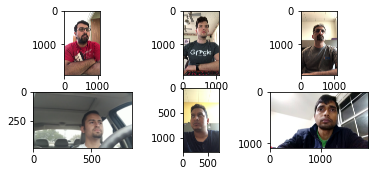

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = train_alert_dir
for i in range(6):
    pyplot.subplot(330 + 1 + i)
    i=i+1
    filename = folder + '/00' + str(i) + '_frame' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

Found 2186 images belonging to 3 classes.
Found 308 images belonging to 3 classes.
Found 311 images belonging to 3 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/15
10/10 [==============================] - 164s 16s/step - loss: 0.9334 - acc: 0.5300 - val_loss: 0.9987 - val_acc: 0.5000
Epoch 2/15
10/10 [==============================] - 86s 9s/step - loss: 0.7650 - acc: 0.5000 - val_loss: 1.1999 - val_acc: 0.4500
Epoch 3/15
10/10 [==============================] - 64s 6s/step - loss: 0.7760 - acc: 0.5400 - val_loss: 1.0777 - val_acc: 0.5550
Epoch 4/15
10/10 [==============================] - 65s 6s/step - loss: 0.7670 - acc: 0.5800 - val_loss: 1.0021 - val_acc: 0.5600
Epoch 5/15
10/10 [==============================] - 46s 5s/step - loss: 0.6988 - acc: 0.5750 - val_loss: 1.1533 - val_acc: 0.4850
Epoch 6/15
10/10 [==============================] - 35s 4s/step - loss: 0.8190 - acc: 0.5484 - val_loss: 1.1061 - val_acc: 0.5850
Epoch 7/15
10/10 [==============================] - 36s 4s/step - loss: 0.7211 - acc: 0.5800 - val_loss: 1.2067 - val_acc: 0.5150
Epoch 8/15
10/10 [==============================] - 38s 4s/step - loss: 0.7535 - acc: 0.

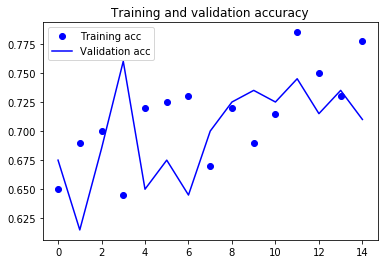

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=15,
      validation_data=test_generator,
      validation_steps=10)

Epoch 1/15
10/10 [==============================] - 98s 10s/step - loss: 0.7040 - acc: 0.6400 - val_loss: 1.0695 - val_acc: 0.5300
Epoch 2/15
10/10 [==============================] - 39s 4s/step - loss: 0.6781 - acc: 0.6700 - val_loss: 1.0333 - val_acc: 0.5100
Epoch 3/15
10/10 [==============================] - 23s 2s/step - loss: 0.6486 - acc: 0.6800 - val_loss: 1.0718 - val_acc: 0.5700
Epoch 4/15
10/10 [==============================] - 18s 2s/step - loss: 0.7309 - acc: 0.6350 - val_loss: 1.0031 - val_acc: 0.5350
Epoch 5/15
10/10 [==============================] - 18s 2s/step - loss: 0.6274 - acc: 0.7000 - val_loss: 0.9896 - val_acc: 0.6150
Epoch 6/15
10/10 [==============================] - 14s 1s/step - loss: 0.6463 - acc: 0.6550 - val_loss: 1.0657 - val_acc: 0.5700
Epoch 7/15
10/10 [==============================] - 14s 1s/step - loss: 0.6787 - acc: 0.6700 - val_loss: 1.0220 - val_acc: 0.5700
Epoch 8/15
10/10 [==============================] - 12s 1s/step - loss: 0.6349 - acc: 0.6

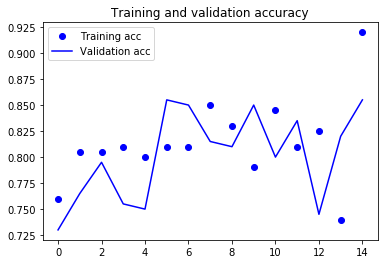

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()

In [ ]:
a = np.array(acc)
m = np.mean(a)
m

0.8139855146408081

In [ ]:
model.save('Driver_Data.h5')

In [ ]:
img_path = "./photot.jpg"
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

In [ ]:
model.predict_classes(x)

array([2], dtype=int64)